In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
# Nomes das colunas (57 atributos + 1 alvo)
col_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_semicolon', 'char_freq_lparen',
    'char_freq_lbracket', 'char_freq_exclamation', 'char_freq_dollar', 'char_freq_pound',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'is_spam'
]

# Carregando a base de dados
url_spam_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df_spam = pd.read_csv(url_spam_data, header=None, names=col_names)

print("Dados carregados com sucesso!")
print("Formato da base:", df_spam.shape)

Dados carregados com sucesso!
Formato da base: (4601, 58)


In [3]:
# Separar os atributos (X) da variável alvo (y)
X = df_spam.drop('is_spam', axis=1)
y = df_spam['is_spam']

# Dividir os dados: 80% para treinamento e 20% para teste
# Usamos stratify=y para garantir que a proporção de spam/não spam seja a mesma nos conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados divididos em treinamento e teste:")
print("Formato de X_train:", X_train.shape)
print("Formato de X_test:", X_test.shape)

Dados divididos em treinamento e teste:
Formato de X_train: (3680, 57)
Formato de X_test: (921, 57)


--- Resultados do Modelo de Classificação Inicial (Baseline) ---
Acurácia: 0.9294

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

Matriz de Confusão:


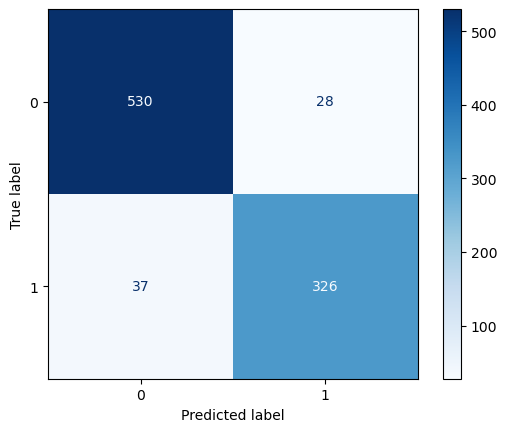

In [4]:
# 1. Escalonamento dos dados
# Essencial aqui, pois os atributos têm escalas muito diferentes.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Treinamento do Modelo Inicial (Baseline)
# Regressão Logística é um ótimo baseline para classificação binária.
modelo_classificacao_inicial = LogisticRegression(max_iter=1000, random_state=42)
modelo_classificacao_inicial.fit(X_train_scaled, y_train)

# 3. Fazendo previsões nos dados de teste
y_pred = modelo_classificacao_inicial.predict(X_test_scaled)

# 4. Avaliação do Modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("--- Resultados do Modelo de Classificação Inicial (Baseline) ---")
print(f"Acurácia: {accuracy:.4f}\n")
print("Relatório de Classificação:")
print(report)

# 5. Visualizando a Matriz de Confusão
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(modelo_classificacao_inicial, X_test_scaled, y_test, cmap='Blues')
plt.show()

Iniciando a seleção de atributos com RFE...
Seleção de atributos concluída!

Os 15 atributos selecionados foram:
['word_freq_3d', 'word_freq_remove', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_lab', 'word_freq_telnet', 'word_freq_415', 'word_freq_85', 'word_freq_cs', 'word_freq_meeting', 'word_freq_edu', 'char_freq_dollar', 'capital_run_length_average', 'capital_run_length_longest']

--- Resultados do Modelo de Classificação Final (com RFE) ---
Número de atributos utilizados: 15
Acurácia: 0.8697

Relatório de Classificação Final:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       558
           1       0.89      0.76      0.82       363

    accuracy                           0.87       921
   macro avg       0.88      0.85      0.86       921
weighted avg       0.87      0.87      0.87       921

Matriz de Confusão Final:


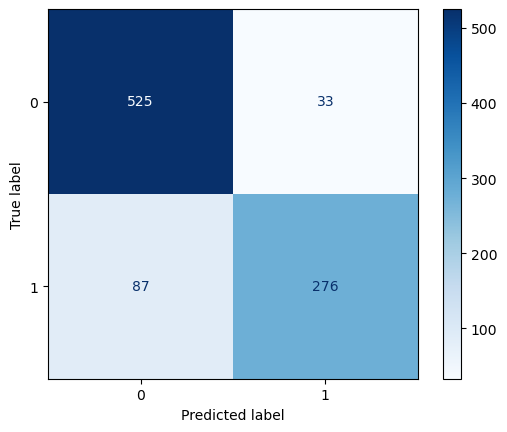

In [5]:
# Importar a classe RFE
from sklearn.feature_selection import RFE

# 1. Configuração do RFE
# Usaremos um modelo de Regressão Logística, o mesmo do nosso baseline, para a seleção.
# O objetivo é selecionar os 15 melhores atributos dos 57 disponíveis.
estimator = LogisticRegression(max_iter=1000, random_state=42)
seletor_rfe = RFE(estimator, n_features_to_select=15, step=1)

# 2. Treinamento do Seletor RFE
print("Iniciando a seleção de atributos com RFE...")
seletor_rfe = seletor_rfe.fit(X_train_scaled, y_train)
print("Seleção de atributos concluída!")

# 3. Visualizando os atributos selecionados
atributos_selecionados = X.columns[seletor_rfe.support_]
print(f"\nOs {len(atributos_selecionados)} atributos selecionados foram:")
print(list(atributos_selecionados))

# 4. Transformando os dados
X_train_rfe = seletor_rfe.transform(X_train_scaled)
X_test_rfe = seletor_rfe.transform(X_test_scaled)

# 5. Treinamento e Avaliação do Modelo Final (com atributos selecionados)
modelo_classificacao_final = LogisticRegression(max_iter=1000, random_state=42)
modelo_classificacao_final.fit(X_train_rfe, y_train)

y_pred_final = modelo_classificacao_final.predict(X_test_rfe)

# 6. Avaliação do Modelo Final
accuracy_final = accuracy_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)

print("\n--- Resultados do Modelo de Classificação Final (com RFE) ---")
print(f"Número de atributos utilizados: {X_train_rfe.shape[1]}")
print(f"Acurácia: {accuracy_final:.4f}\n")
print("Relatório de Classificação Final:")
print(report_final)

# 7. Visualizando a Matriz de Confusão Final
print("Matriz de Confusão Final:")
ConfusionMatrixDisplay.from_estimator(modelo_classificacao_final, X_test_rfe, y_test, cmap='Blues')
plt.show()

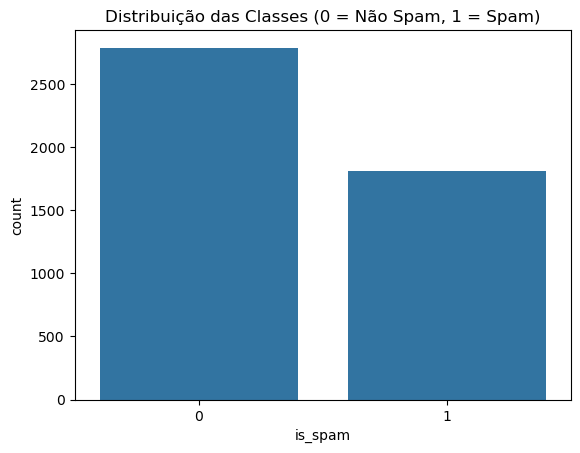

In [6]:
# Célula para gerar o gráfico de balanceamento
sns.countplot(x='is_spam', data=df_spam)
plt.title('Distribuição das Classes (0 = Não Spam, 1 = Spam)')
plt.show()